In [6]:
from data.load import load_training_data

file_path = "data"

# df = load_training_data("data/pyspam_features_with_offline.jsonl")

df = load_training_data("data/bq-results-20251207-053959-1765086112714.json")
df.head()

,pkg_name,n_name_len,has_digit_in_name,has_dash_or_underscore,cat_name_case,n_summary_len,n_desc_len,n_desc_lines,has_code_block_in_desc,n_urls_in_desc,...,t_last_release,latest_summary,latest_description,latest_project_urls,distinct_authors,distinct_maintainers,distinct_keywords,distinct_classifiers,latest_dependencies,is_spam
0,tree-sitter-css,15,False,True,lower,27,1086,22,False,14,...,2025-09-28 11:37:13.387778 UTC,CSS grammar for tree-sitter,# tree-sitter-css [![CI][ci]](https://github....,"[Homepage, https://github.com/tree-sitter/tree...","[Max Brunsfeld <maxbrunsfeld@gmail.com>, Amaan...",[],"[incremental, parsing, tree-sitter, css]","[Topic :: Software Development :: Compilers, I...","[tree-sitter~=0.24; extra == ""core""]",0
1,requests-mock,13,False,True,lower,44,2858,102,False,13,...,2024-03-29 03:54:29.446559 UTC,Mock out responses from the requests package,=============================== requests-mock ...,"[Source, https://github.com/jamielennox/reques...",[jamielennox@gmail.com],[],[],[Programming Language :: Python :: Implementat...,"[requests<3,>=2.22, fixtures; extra == ""fixture""]",0
2,liblapack-dev,13,False,True,lower,36,0,1,False,0,...,2023-10-09 05:27:41.926301 UTC,DEPEndency C0nfusion P0C for alibaba,NaN,[],[naveenkumawat1995@gmail.com],[],[],"[Operating System :: OS Independent, Programmi...",[],1
3,upgini,6,False,False,lower,57,39820,690,True,79,...,2025-11-20 12:46:53.597151 UTC,Intelligent data search & enrichment for Machi...,"<!-- <h2 align=""center""> <a href=""https://upg...","[Bug Reports, https://github.com/upgini/upgini...","[madewithlove@upgini.com, Upgini Developers <m...",[],"[data science,machine learning,data mining,aut...","[Operating System :: OS Independent, License :...","[catboost>=1.0.3, category-encoders>=2.8.1, fa...",1
4,opencv-python,13,False,True,lower,43,19952,256,True,33,...,2025-07-07 09:20:52.389996 UTC,Wrapper package for OpenCV python bindings.,[![Downloads](https://static.pepy.tech/badge/o...,[],[],[],[],"[Programming Language :: Python :: 2.7, Progra...",[],0


In [7]:
print(df.shape)
print(df.columns)
print(df.head(3))

(15587, 54)
Index(['pkg_name', 'n_name_len', 'has_digit_in_name', 'has_dash_or_underscore',
       'cat_name_case', 'n_summary_len', 'n_desc_len', 'n_desc_lines',
       'has_code_block_in_desc', 'n_urls_in_desc', 'has_suspicious_kw',
       'pct_non_ascii_desc', 't_age_first_release_days',
       't_age_last_release_days', 'n_versions', 't_median_release_gap_days',
       'has_single_release', 't_time_of_day_bucket',
       'cat_weekday_of_last_release', 'n_maintainers',
       'pct_free_email_domains', 'has_disposable_email', 'has_missing_author',
       'has_homepage', 'has_repo_url', 'cat_repo_host', 'has_issue_tracker',
       'has_docs_url', 'has_license', 'cat_license_family', 'n_classifiers',
       'has_prog_lang_classifier', 'has_typing_classifier', 'n_distributions',
       'n_requires', 'has_extras', 'n_downloads_7d', 'n_downloads_30d',
       'n_dependents_est', 'rule_no_repo_low_desc_len',
       'rule_suspicious_name_and_dep', 'licenses', 'versions',
       't_first_rele

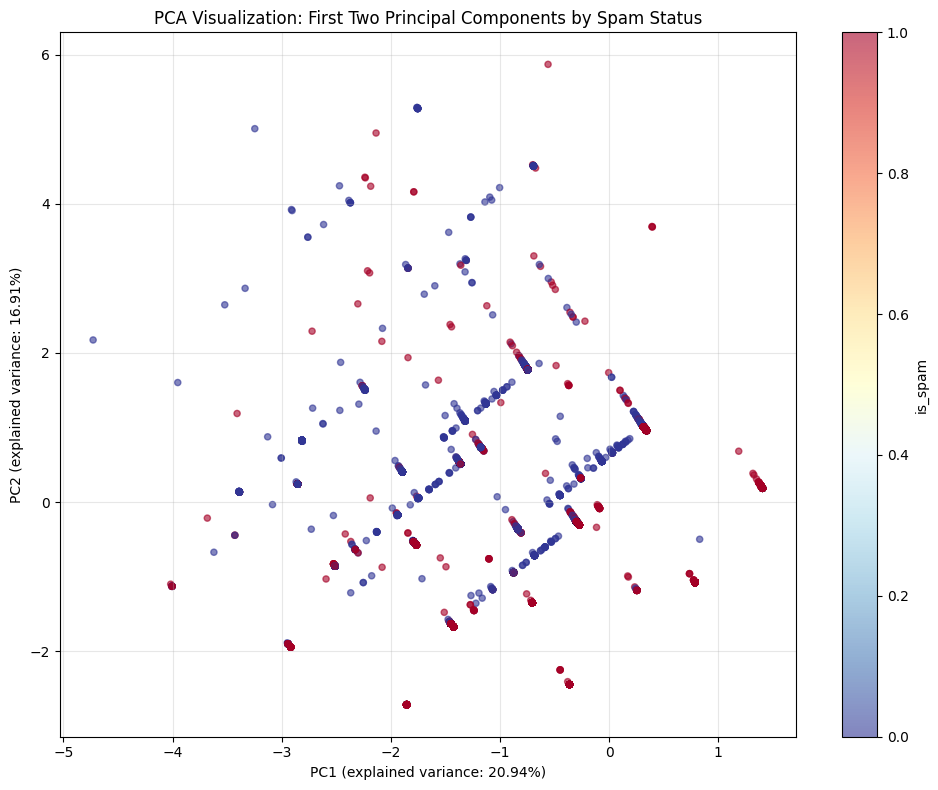

Total explained variance: 37.86%
PC1 explained variance: 20.94%
PC2 explained variance: 16.91%


In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate target variable
target = df["is_spam"].copy()

# Select feature columns (exclude pkg_name and is_spam)
feature_cols = [col for col in df.columns if col not in ["pkg_name", "is_spam"]]

# Get feature data
X = df[feature_cols].copy()

# Handle categorical columns - convert to numeric or drop
# For boolean columns, convert to int
bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

# For categorical string columns, we'll use one-hot encoding or drop them
# Let's identify categorical columns
cat_cols = [
    "cat_name_case",
    "cat_weekday_of_last_release",
    "cat_repo_host",
    "cat_license_family",
    "t_time_of_day",
]
# One-hot encode categorical columns
X_encoded = pd.get_dummies(
    X, columns=[col for col in cat_cols if col in X.columns], drop_first=True
)

# Handle any remaining non-numeric columns
numeric_cols = X_encoded.select_dtypes(include=[np.number]).columns
X_final = X_encoded[numeric_cols]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=target, cmap="RdYlBu_r", alpha=0.6, s=20
)
plt.colorbar(scatter, label="is_spam")
plt.xlabel(f"PC1 (explained variance: {pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"PC2 (explained variance: {pca.explained_variance_ratio_[1]:.2%})")
plt.title("PCA Visualization: First Two Principal Components by Spam Status")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.2%}")
print(f"PC1 explained variance: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2 explained variance: {pca.explained_variance_ratio_[1]:.2%}")


In [11]:
X.head()

,n_name_len,has_digit_in_name,has_dash_or_underscore,cat_name_case,n_summary_len,n_desc_len,n_desc_lines,has_code_block_in_desc,n_urls_in_desc,has_suspicious_kw,...,t_first_release,t_last_release,latest_summary,latest_description,latest_project_urls,distinct_authors,distinct_maintainers,distinct_keywords,distinct_classifiers,latest_dependencies
0,15,0,1,lower,27,1086,22,0,14,0,...,2024-05-04 08:02:57.686763 UTC,2025-09-28 11:37:13.387778 UTC,CSS grammar for tree-sitter,# tree-sitter-css [![CI][ci]](https://github....,"[Homepage, https://github.com/tree-sitter/tree...","[Max Brunsfeld <maxbrunsfeld@gmail.com>, Amaan...",[],"[incremental, parsing, tree-sitter, css]","[Topic :: Software Development :: Compilers, I...","[tree-sitter~=0.24; extra == ""core""]"
1,13,0,1,lower,44,2858,102,0,13,0,...,2014-06-16 13:57:52.376889 UTC,2024-03-29 03:54:29.446559 UTC,Mock out responses from the requests package,=============================== requests-mock ...,"[Source, https://github.com/jamielennox/reques...",[jamielennox@gmail.com],[],[],[Programming Language :: Python :: Implementat...,"[requests<3,>=2.22, fixtures; extra == ""fixture""]"
2,13,0,1,lower,36,0,1,0,0,0,...,2023-10-09 05:27:41.926301 UTC,2023-10-09 05:27:41.926301 UTC,DEPEndency C0nfusion P0C for alibaba,NaN,[],[naveenkumawat1995@gmail.com],[],[],"[Operating System :: OS Independent, Programmi...",[]
3,6,0,0,lower,57,39820,690,1,79,0,...,2021-12-03 00:17:21.07973 UTC,2025-11-20 12:46:53.597151 UTC,Intelligent data search & enrichment for Machi...,"<!-- <h2 align=""center""> <a href=""https://upg...","[Bug Reports, https://github.com/upgini/upgini...","[madewithlove@upgini.com, Upgini Developers <m...",[],"[data science,machine learning,data mining,aut...","[Operating System :: OS Independent, License :...","[catboost>=1.0.3, category-encoders>=2.8.1, fa..."
4,13,0,1,lower,43,19952,256,1,33,0,...,2016-09-03 18:35:12.496408 UTC,2025-07-07 09:20:52.389996 UTC,Wrapper package for OpenCV python bindings.,[![Downloads](https://static.pepy.tech/badge/o...,[],[],[],[],"[Programming Language :: Python :: 2.7, Progra...",[]
